## Implementation of Multiple Linear Regression in Real Estate Price Prediction Problem 

### Import the necessary problems 

In [207]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.simplefilter( action = 'ignore' , category = FutureWarning )


### Reading the data from csv file 

In [208]:
df = pd.read_csv(r"C:\Users\smoni\Downloads\Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [209]:
df.shape

(13320, 9)

In [210]:
df 

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


### Data Wrangling 

In [211]:
df["area_type"].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [212]:
df["availability"].value_counts()

availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64

In [213]:
df["location"].value_counts()

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [214]:
df["society"].value_counts()

society
GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
Amionce     1
JaghtDe     1
Jauraht     1
Brity U     1
RSntsAp     1
Name: count, Length: 2688, dtype: int64

In [215]:
df.balcony.value_counts()

balcony
2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: count, dtype: int64

In [216]:
df = df.drop(['society' , 'availability'] , axis = 'columns')
df.shape 

(13320, 7)

### Data Cleaning : Handling missing values ( NA values ) 

In [217]:
df.isnull().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [218]:
df = df.dropna()
df.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [219]:
df.shape

(12710, 7)

### Feature Engineering 

In [220]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
df.bhk.unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

In [221]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [222]:
def is_float(x):       ## This is a utility function which checks whether a given value can be converted into a float number or not 
    try:
        float(x)
    except:
        return False
    return True     


In [223]:
df[~df['total_sqft'].apply(is_float)].head(10)

,area_type,location,size,total_sqft,bath,balcony,price,bhk
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
410,Super built-up Area,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Super built-up Area,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2
661,Super built-up Area,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,2
672,Built-up Area,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,4
772,Super built-up Area,Banashankari Stage VI,2 BHK,1160 - 1195,2.0,0.0,59.935,2


#### Above shows that total_sqft can be a range( e.g. 2100 - 2850 ) . For such case we can just take average of min and max value in the range . There are other cases such as 34.465Sq. Meter which one can convert to square ft using unit conversion . I am going to just drop such corner cases to keep things simple as I have enough observations for my analysis 

In [224]:
# Convert the column to string 
df['total_sqft'] = df['total_sqft'].astype(str) 

In [225]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None 

In [226]:
df.total_sqft = df.total_sqft.apply(convert_sqft_to_num) 
df = df[df.total_sqft.notnull()]

In [227]:
# Converting the column to float 
df['total_sqft'] = df['total_sqft'].astype(float)

In [228]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12668 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   12668 non-null  object 
 1   location    12668 non-null  object 
 2   size        12668 non-null  object 
 3   total_sqft  12668 non-null  float64
 4   bath        12668 non-null  float64
 5   balcony     12668 non-null  float64
 6   price       12668 non-null  float64
 7   bhk         12668 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 890.7+ KB


### Feature Engineering 

In [230]:
df = df.copy()
df['price_per_sqft'] = df['price']*100000/df['total_sqft']
df.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [231]:
df_stats = df['price_per_sqft'].describe()
df_stats

count    1.266800e+04
mean     6.876277e+03
std      2.263354e+04
min      2.678298e+02
25%      4.242721e+03
50%      5.376344e+03
75%      7.142857e+03
max      2.300000e+06
Name: price_per_sqft, dtype: float64

#### Examine locations which is a categorical variable . We need to apply dimensionality reduction technique here to reduce number of locations 

In [232]:
df.location = df.location.apply( lambda x: x.strip())
location_stats = df['location'].value_counts(ascending = False)
location_stats 

location
Whitefield           514
Sarjapur  Road       372
Electronic City      302
Kanakpura Road       259
Thanisandra          233
                    ... 
Subbannaiah Palya      1
whitefiled             1
Medi Agrahara          1
Sadduguntepalya        1
Abshot Layout          1
Name: count, Length: 1248, dtype: int64

In [233]:
location_stats.values.sum()

12668

In [234]:
len(location_stats[location_stats > 10 ])

235

#### Any location having less than 10 data points should be tagged as "other" location . In this way number of categories can be reduced by huge amount . Later on when we do one hot encoding , it will help us with having fewer dummy variables 

In [235]:
location_stats_less_than_10 = location_stats[location_stats <= 10]
location_stats_less_than_10 

location
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Nagappa Reddy Layout     10
Dairy Circle             10
                         ..
Subbannaiah Palya         1
whitefiled                1
Medi Agrahara             1
Sadduguntepalya           1
Abshot Layout             1
Name: count, Length: 1013, dtype: int64

In [236]:
df.location = df.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x )
len(df.location.unique())

236

In [237]:
df.shape

(12668, 9)

### Outlier Removal Using Business Logic 

##### As a Data Scientist when you have a coversation with your business manager ( who has expertise in real estate ) , he will tell you that normally square ft per bedroom is 300 i.e. 2 Bhk apartment is minimum 600 square ft . If you have for example 400 sq ft apartment with 2 Bhk than that seems suspicious and can be removed as an outlier . We will remove such outliers by keeping our minimum threshold to be 300 sqft per Bhk 

In [238]:
df[df.total_sqft/df.bhk < 300].head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
58,Plot Area,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Plot Area,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,Plot Area,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000
78,Built-up Area,Kaval Byrasandra,2 BHK,460.0,1.0,0.0,22.0,2,4782.608696
89,Plot Area,Rajaji Nagar,6 Bedroom,710.0,6.0,3.0,160.0,6,22535.211268


#### Above data points , we have 6 bhk apartment with total sqft 710 and an 8 bhk apartment with total sqft 1350 . These are clear outliers which should be removed from our data before modelling 

In [239]:
df = df[~(df.total_sqft/df.bhk < 300)]  # For pandas DataFrame ~ is used as a logical NOT operator on Boolean Series , it gives all those rows where condition is false 
df.shape

(12013, 9)

In [240]:
df.price_per_sqft.describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_sqft, dtype: float64

#### Here we find that min price per sqft is 267 rs/sqft whereas max is 176470 this shows a wide variation in property prices . We should remove outliers per location using mean and standard deviation. 

In [241]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key , subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        sd = np.std(subdf.price_per_sqft)
        reduced_df= subdf[(subdf.price_per_sqft > ( m - sd)) & ( subdf.price_per_sqft <= ( m + sd ))]
        df_out = pd.concat([df_out , reduced_df] , ignore_index = True ) 
    return df_out 
df = remove_pps_outliers(df) 
df.shape 

(9852, 9)

#### Let's look out for a given location how does the 2BHK and 3BHK property price looks like 

In [242]:
import matplotlib.pyplot as plt 
%matplotlib inline  
plt.figure(figsize = (20,10))

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

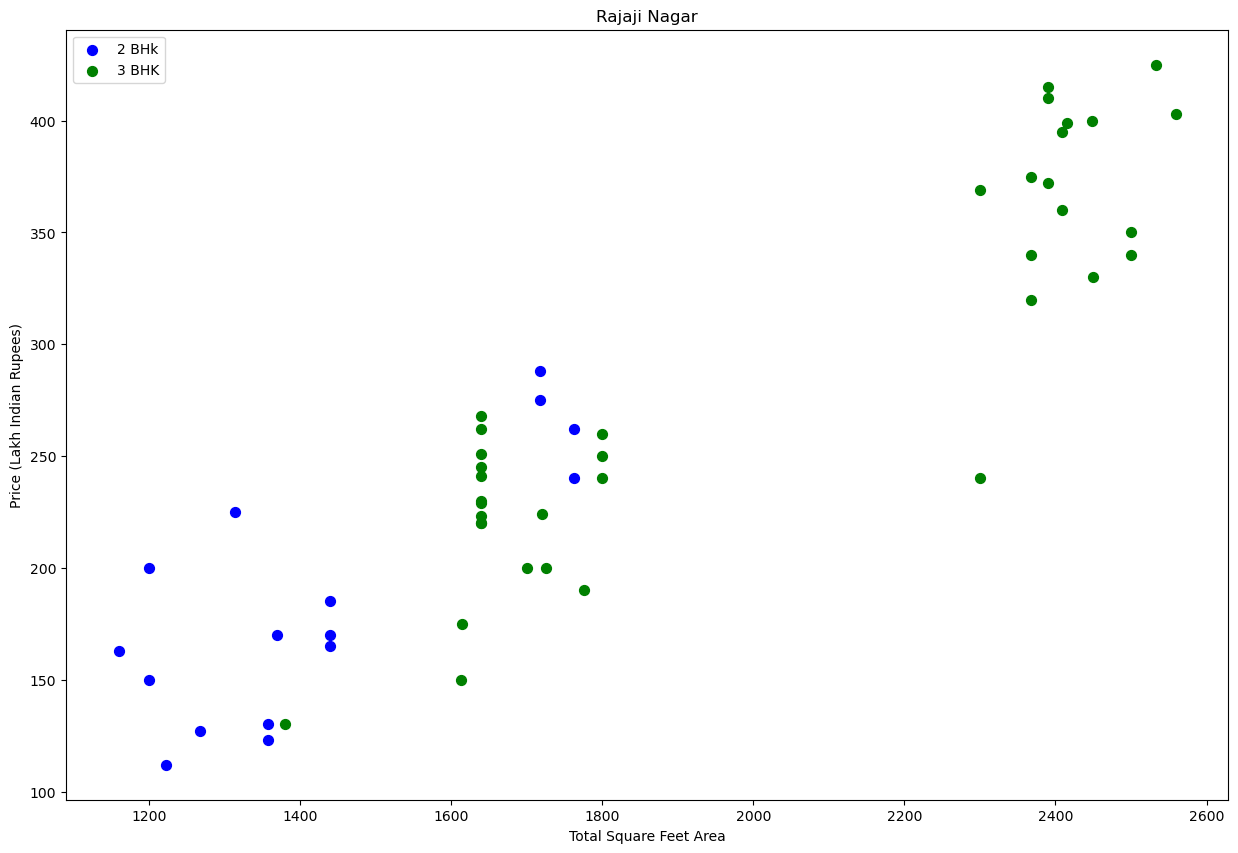

In [243]:
def plot_scatter_chart(df , location): 
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    plt.figure(figsize = (15,10)) 
    plt.scatter(bhk2.total_sqft , bhk2.price , color = "blue" , label = "2 BHk" , s = 50 ) 
    plt.scatter(bhk3.total_sqft , bhk3.price , color = "green" , label = "3 BHK" , s = 50)
    plt.xlabel("Total Square Feet Area") 
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df,"Rajaji Nagar") 
plt.show()

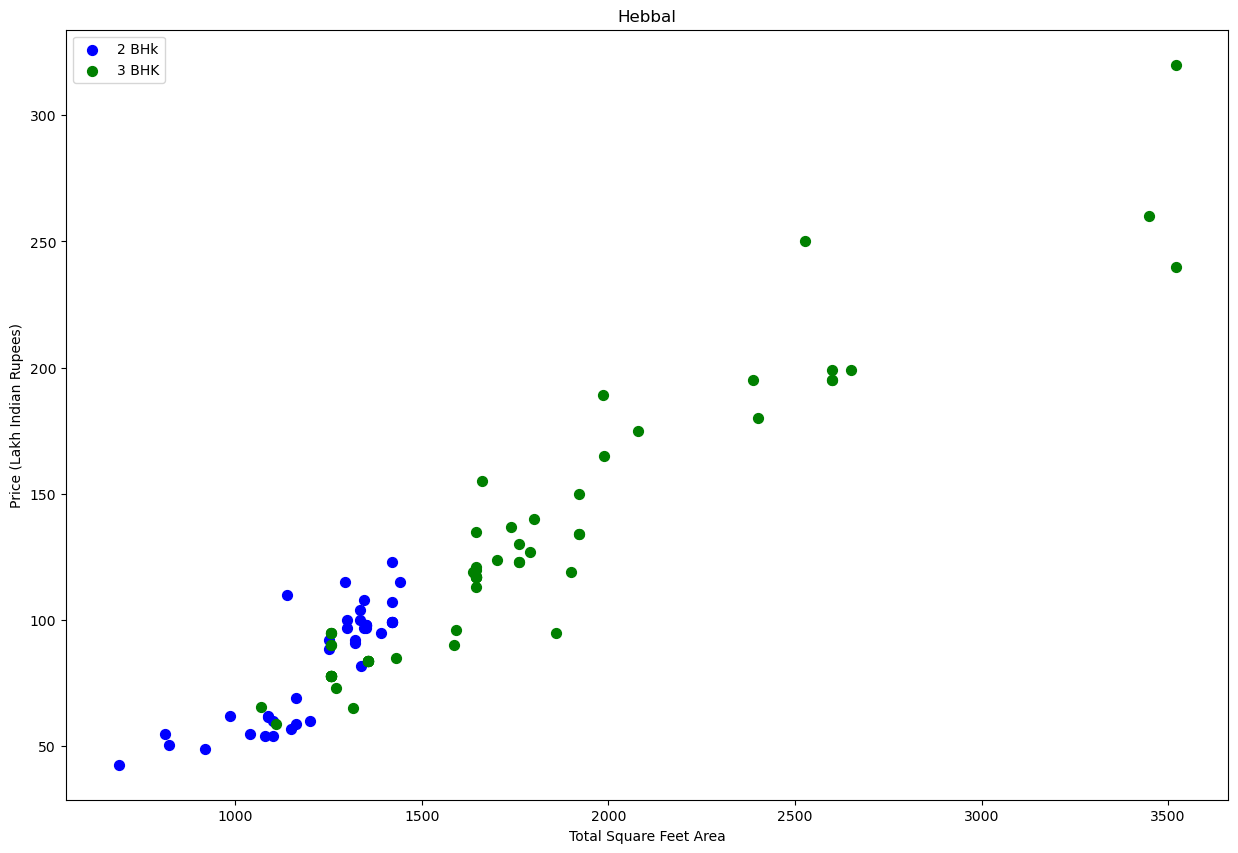

In [244]:
plot_scatter_chart(df,"Hebbal")
plt.show()

#### We should also remove those data points where for same location , say price of 3 bedroom apartment is less than 2 bedroom apartment( with same square ft area ) . what we will do is for a given location , we will build a dictionary of stats per bhk  

##### Now we can remove those 2 bhk apartments whose price_per_sqft is less than mean price_per_sqft of 1 bhk apartment 

In [245]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location , location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk , bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std'  : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
            for bhk , bhk_df in location_df.groupby('bhk'):
                stats = bhk_stats.get(bhk-1)
                if stats and stats['count']>5 :
                    exclude_indices = np.append(exclude_indices , bhk_df[bhk_df.price_per_sqft < stats['mean']].index.values)
    return df.drop(exclude_indices , axis = 'index')
df = remove_bhk_outliers(df) 
df.shape

(7014, 9)

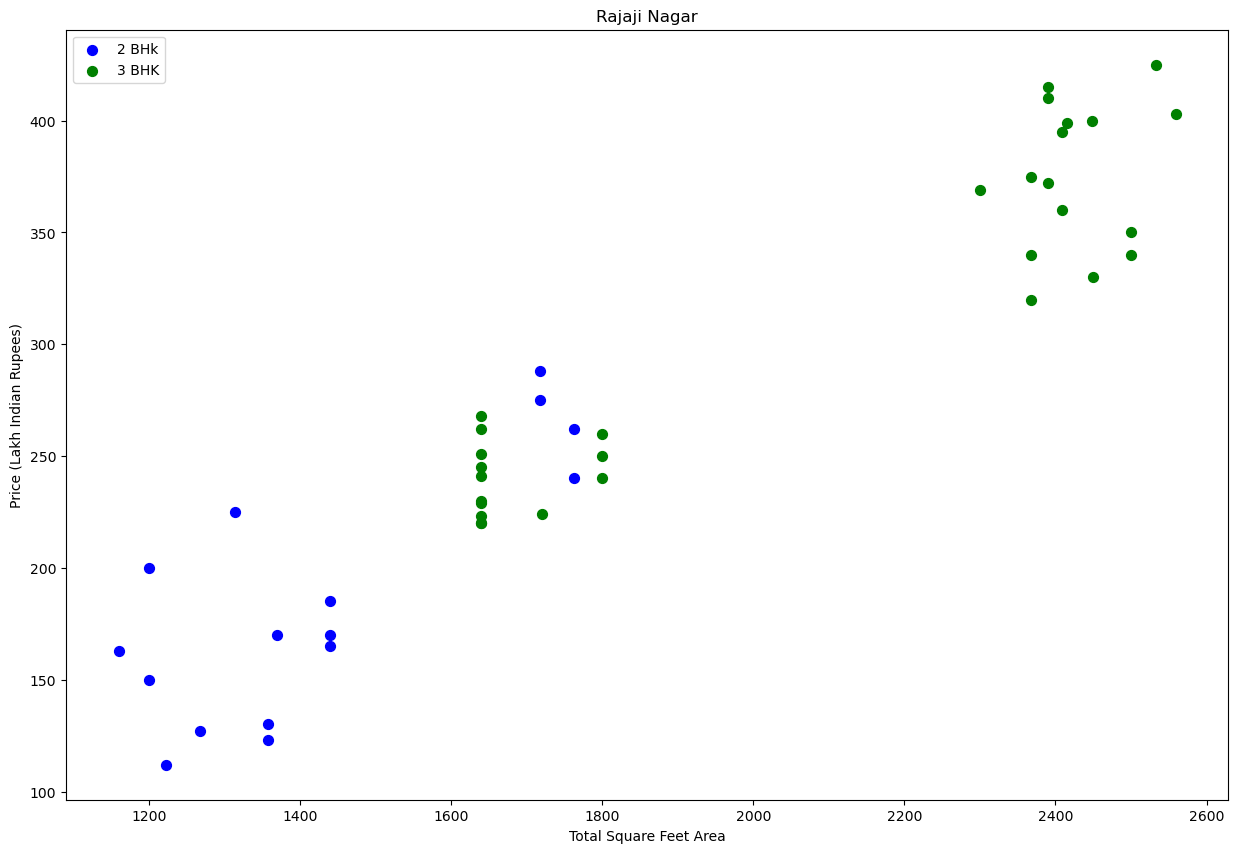

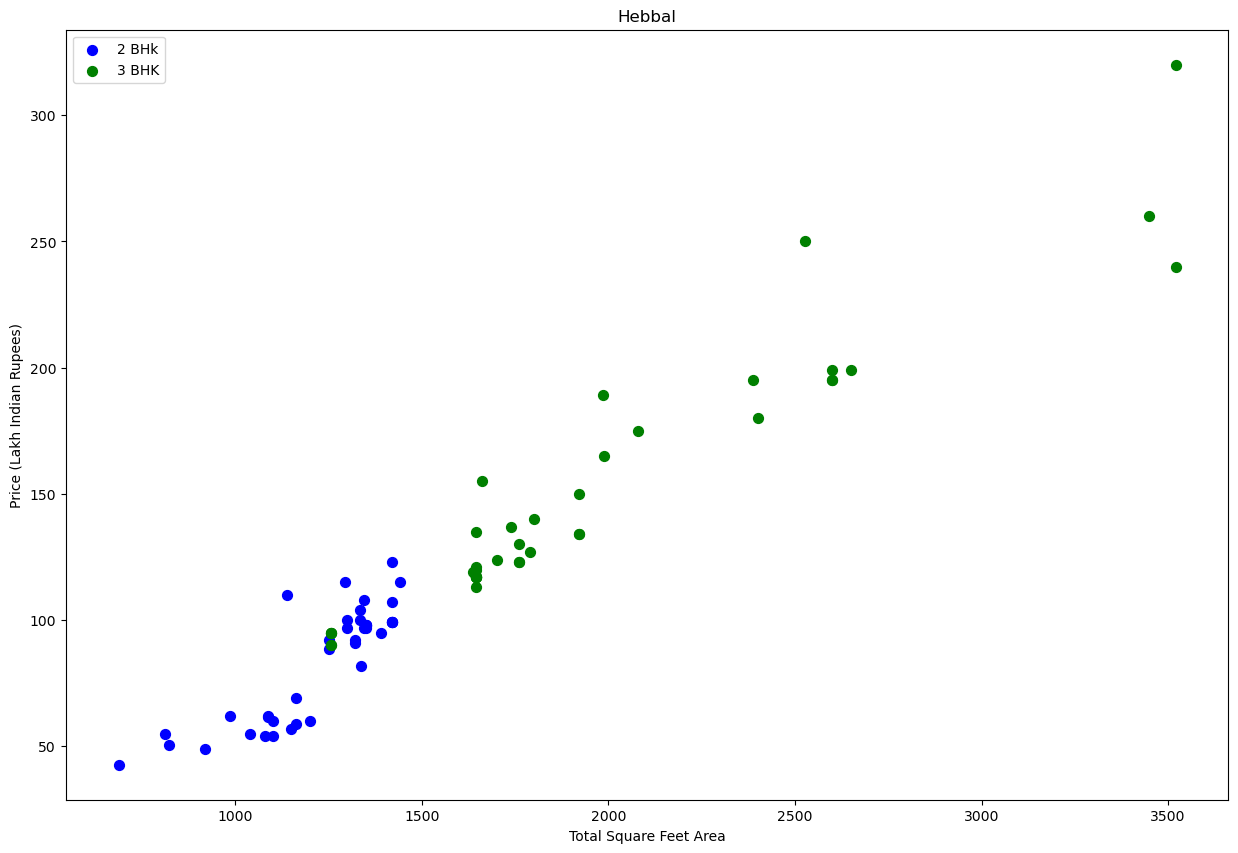

In [246]:
plot_scatter_chart(df , "Rajaji Nagar")
plot_scatter_chart( df , "Hebbal")
plt.show()

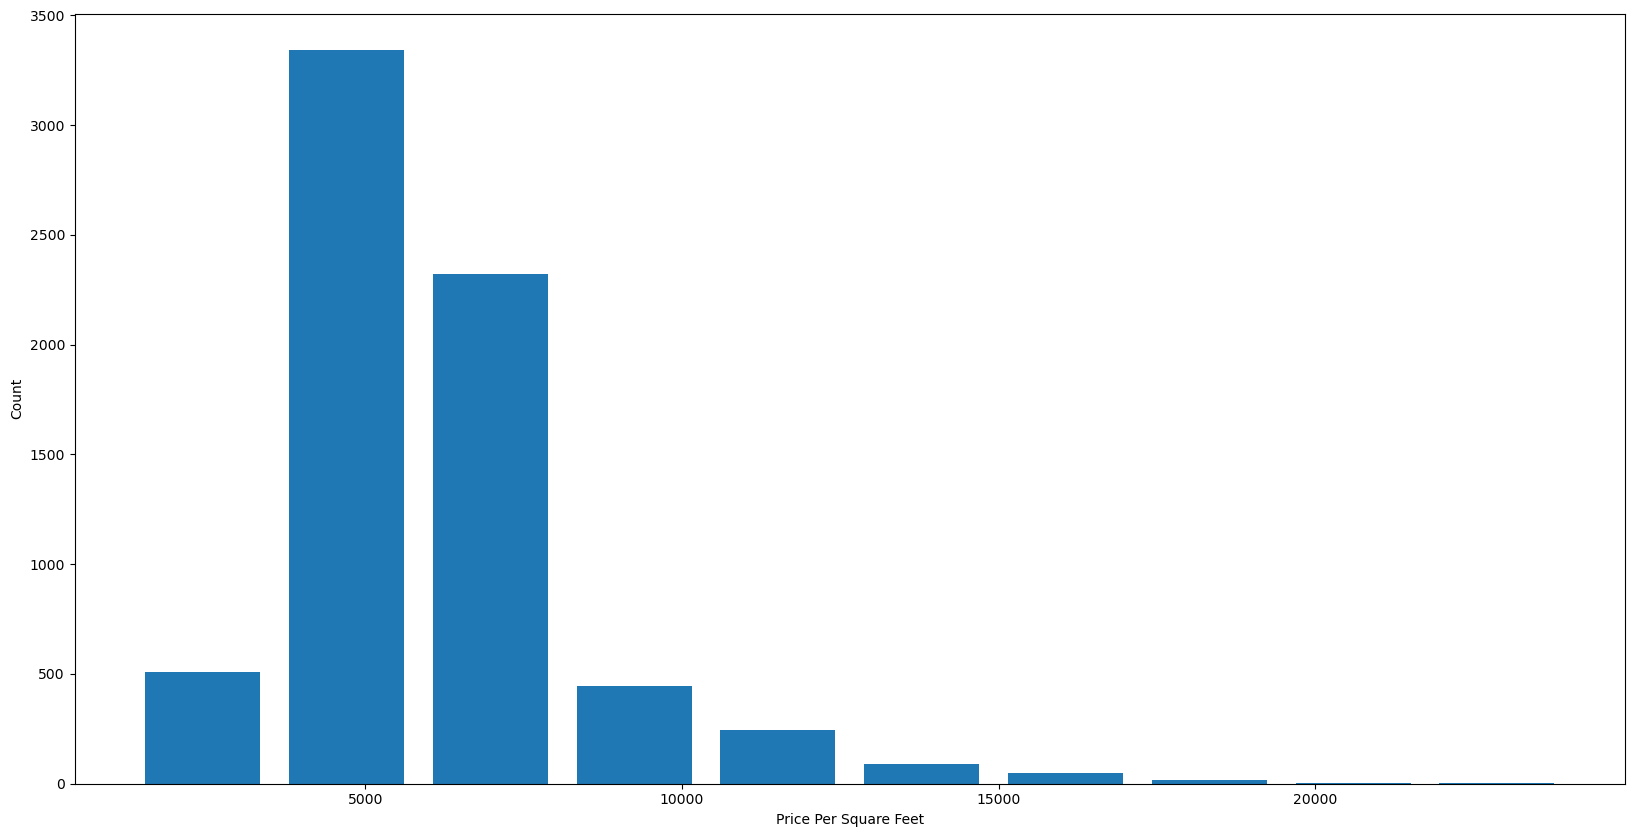

In [247]:
plt.figure(figsize = (20,10))
plt.hist(df.price_per_sqft , rwidth = 0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")
plt.show()

### Outlier Removal using Bathrooms Feature 

In [248]:
df.bath.unique()

array([ 4.,  3.,  2.,  8.,  1.,  5.,  6.,  7.,  9., 13.])

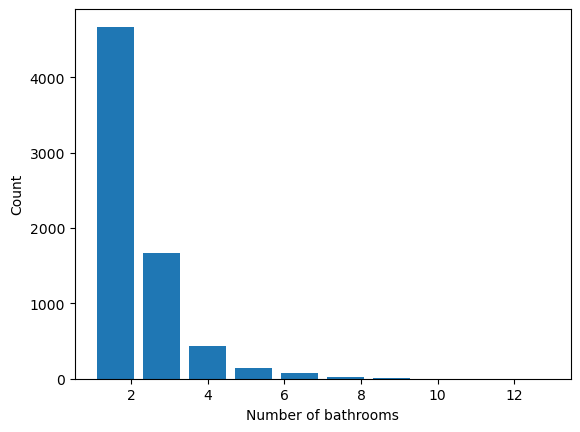

In [249]:
plt.hist(df.bath, rwidth = 0.8 )
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")
plt.show()

In [250]:
df[df.bath> 10]

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
9267,Super built-up Area,other,13 BHK,5425.0,13.0,0.0,275.0,13,5069.124424


#### It is unusual to have 2 more bathrooms than number of bedrooms in a home 

In [251]:
df[df.bath > df.bhk + 2]

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
1542,Built-up Area,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.032520
6443,Super built-up Area,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330
8082,Super built-up Area,other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689


In [252]:
print(df)

                 area_type             location       size  total_sqft  bath  \
0     Super built-up  Area  1st Block Jayanagar      4 BHK      2850.0   4.0   
1     Super built-up  Area  1st Block Jayanagar      3 BHK      1630.0   3.0   
2     Super built-up  Area  1st Block Jayanagar      3 BHK      1875.0   2.0   
3           Built-up  Area  1st Block Jayanagar      3 BHK      1200.0   2.0   
4     Super built-up  Area  1st Block Jayanagar      2 BHK      1235.0   2.0   
...                    ...                  ...        ...         ...   ...   
9842  Super built-up  Area                other      2 BHK      1155.0   2.0   
9844          Carpet  Area                other      2 BHK      1200.0   2.0   
9845  Super built-up  Area                other      1 BHK      1800.0   1.0   
9848  Super built-up  Area                other      2 BHK      1353.0   2.0   
9849            Plot  Area                other  1 Bedroom       812.0   1.0   

      balcony  price  bhk  price_per_sq

##### Again a business manager have a conversation with you that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom , you will have total bath = total bedroom + 1 max . Anything above that is an outlier or a data error and can be removed . 

In [253]:
df = df[df.bath < df.bhk + 2]
df.shape

(6947, 9)

In [254]:
df.area_type.nunique()

4

In [255]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4,15017.543860
1,Super built-up Area,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.0,3,11901.840491
2,Super built-up Area,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.0,3,12533.333333
3,Built-up Area,1st Block Jayanagar,3 BHK,1200.0,2.0,0.0,130.0,3,10833.333333
4,Super built-up Area,1st Block Jayanagar,2 BHK,1235.0,2.0,2.0,148.0,2,11983.805668


In [256]:
df = df.drop(['size' , 'price_per_sqft'] ,axis = 'columns') ## because we already have a column (bhk) that carries the same information in a cleaner form and we used price_per_sqft for outlier detection , after removing outliers you don't really need price_per_sqft for model training keeping it may cause data leakage 

### One Hot Encoding for Location 

In [257]:
dummies = pd.get_dummies(df.location , dtype = float ) ## converts each unique category in location(categorical column) into a new column , Each column have values 0.0 or 1.0
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [258]:
df = pd.concat([df , dummies.drop('other' , axis = 'columns')] , axis = 'columns')
df.head()

,area_type,location,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Built-up Area,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Super built-up Area,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [259]:
df = df.drop('location' , axis = 'columns')

In [260]:
# performing one hot encoding for area_type 
area_type_encoded = pd.get_dummies(df.area_type , prefix = 'area_type' , drop_first = True) ##drops the first category to avoid the dummy variable trap(Multicollinearity)
# Concatenate the original DataFrame with the one-hot encoded columns 
df = pd.concat([df , area_type_encoded] , axis = 'columns')
df.drop('area_type' , axis = 1 , inplace = True)
df.head()

,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,2850.0,4.0,1.0,428.0,4,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,True
1,1630.0,3.0,2.0,194.0,3,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,True
2,1875.0,2.0,3.0,235.0,3,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,True
3,1200.0,2.0,0.0,130.0,3,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False
4,1235.0,2.0,2.0,148.0,2,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,True


In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6947 entries, 0 to 9849
Columns: 243 entries, total_sqft to area_type_Super built-up  Area
dtypes: bool(3), float64(239), int64(1)
memory usage: 12.8 MB


In [262]:
## Converting Boolean Columns to int 
df = df.astype({ col: 'int' for col in df.select_dtypes(include = 'bool').columns })

### VIF ( Variance Inflation Factor )

In [263]:
import pandas as pd 
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools import add_constant

# Add a constant column for each feature 
x = add_constant(df)

# Calculate VIF for each feature 
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_list = []
for i in range(x.shape[1]):
    vif_list.append(variance_inflation_factor(x.values,i))
vif_data["VIF"] = vif_list    
print(vif_data)

                            feature        VIF
0                             const  23.666785
1                        total_sqft   6.129481
2                              bath   5.810025
3                           balcony   1.329248
4                             price   6.540839
..                              ...        ...
239                     Yelenahalli   1.010180
240                    Yeshwanthpur   1.038542
241          area_type_Carpet  Area   1.056646
242            area_type_Plot  Area   1.587355
243  area_type_Super built-up  Area   1.527774

[244 rows x 2 columns]


In [264]:
print(vif_data[vif_data["VIF"] >= 5])

      feature        VIF
0       const  23.666785
1  total_sqft   6.129481
2        bath   5.810025
4       price   6.540839
5         bhk   5.519117


### Model Fitting 

In [273]:
df.shape

(6947, 243)

In [274]:
x = df.drop(['price'] , axis = 'columns')
x.head(3)

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,2850.0,4.0,1.0,4,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
1,1630.0,3.0,2.0,3,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
2,1875.0,2.0,3.0,3,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1


In [275]:
y = df.price 
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

### Splitting 

In [277]:
from sklearn.model_selection import train_test_split 
x_train , x_test , y_train , y_test = train_test_split( x , y , test_size = 0.2 , random_state = 10)

In [278]:
from sklearn.linear_model import LinearRegression 
linear_regressor = LinearRegression()
linear_regressor.fit(x_train,y_train)
linear_regressor.score(x_test , y_test) ## Returns the coefficient of Determination R^2 which measures how much variance in y is explained by the model 

0.8592947155170351

### Adjusted R square 


In [279]:
n = x_test.shape[0] # number of observations 
p = x_test.shape[1] # number of predictors 
r2 = linear_regressor.score(x_test , y_test)
adjusted_r2 = 1 - (1 - r2)*(n - 1)/(n - p - 1)
print(adjusted_r2)

0.8296079859225473


### Using K fold cross validation to measure accuracy of our Linear Regression Model 

#### Cross validation is necessary because model's performance can be underestimated or overestimated on the basis of test set 

In [145]:
from sklearn.model_selection import ShuffleSplit 
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit( n_splits = 5 , test_size = 0.2 , random_state = 0 ) 
cross_val_score(LinearRegression() , x , y , cv = cv ) 

array([0.86787247, 0.85555018, 0.83702514, 0.87807216, 0.79039852])

In [280]:
cross_r2 = np.array([0.86787247, 0.85555018, 0.83702514, 0.87807216, 0.79039852])
np.mean(cross_r2)

0.845783694

### GridSearchCV For Linear Regression and Lasso Regression 

In [326]:
from sklearn.model_selection import GridSearchCV , ShuffleSplit 
from sklearn.linear_model import LinearRegression , Lasso , Ridge 
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline 
from sklearn.metrics import make_scorer , mean_squared_error , r2_score 
import numpy as np 
import pandas as pd 

def adjusted_r2_score( y_true , Y_pred , X ): 
    ##calculating the adjusted R^2 score
    r2 = r2_score(y_true , Y_pred)
    n = x.shape[0]
    p = x.shape[1]
    return 1 - (1 - r2)*( n - 1)/(n - p - 1)

def rmse_score(y_true , Y_pred):
    return np.sqrt(mean_squared_error(y_true , Y_pred))

def find_best_model_using_gridsearchcv(x,y):
    # Defining models and their hyperparameters 
    algorithms = {
        'linear_regression': {
            'model' : Pipeline([
                ('scaler' , StandardScaler()),
                ('regressor' , LinearRegression())
            ]) , 
            'params' : {
            }
        },
        'lasso' : {
        'model' : Lasso(),
        'params' : {
            'alpha' : [0.1,0.5,1,2,5,10],
            'selection' : ['random' , 'cyclic']
        }
        },
        'ridge' : {
        'model' : Ridge(),
        'params' : {
            'alpha' : [0.1,0.5,1,2,5,10]
        }
        }
                   }  
    results = []
    cv = ShuffleSplit(n_splits = 5 , test_size = 0.2 , random_state = 0)

    for algo_name , config in algorithms.items():
           gs = GridSearchCV(config['model'] , config['params'] , cv = cv , return_train_score = False )
           gs.fit(x,y)

           ## Predict using the best estimator 
           y_pred = gs.predict(x)

        ## Calculate adjusted R^2 and RMSE 
           adj_r2 = adjusted_r2_score(y,y_pred,x)
           rmse = rmse_score(y , y_pred)

           results.append({
              'model' : algo_name , 
              'best_score' : gs.best_score_,
              'best_params' : gs.best_params_,
              'adjusted_r2' : adj_r2 , 
              'rmse' : rmse
            })

    return pd.DataFrame(results , columns = ['model' , 'best_score' , 'best_params' , 'adjusted_r2' , 'rmse'])

# Example Usage 
best_model_results = find_best_model_using_gridsearchcv(x,y)
print(best_model_results)
    

               model  best_score                            best_params  \
0  linear_regression    0.845784                                     {}   
1              lasso    0.793494  {'alpha': 0.1, 'selection': 'cyclic'}   
2              ridge    0.845870                         {'alpha': 0.1}   

   adjusted_r2       rmse  
0     0.841596  30.853355  
1     0.791134  35.428456  
2     0.841576  30.855219  


In [282]:
##linear_regressor
y_predict = linear_regressor.predict(x_test)
pd.DataFrame({'Test' : y_test , 'Prediction' : y_predict}).head(10)

,Test,Prediction
7600,36.85,40.358422
9359,325.00,233.447488
795,66.00,61.266996
2522,44.00,39.623644
949,62.00,33.811476
1824,71.00,77.030371
9658,120.00,98.162783
703,41.13,62.290833
77,88.00,90.358647
3016,110.00,127.076511


### Evaluation of the Model 

In [283]:
from sklearn import metrics 
MAE = metrics.mean_absolute_error(y_predict , y_test)
MSE = metrics.mean_squared_error(y_predict , y_test)
RMSE = np.sqrt(MSE)

pd.DataFrame([MAE , MSE , RMSE] , index = ['MAE' , 'MSE' , 'RMSE'] , columns = ['Metrics'])

,Metrics
MAE,15.728459
MSE,723.124933
RMSE,26.890982


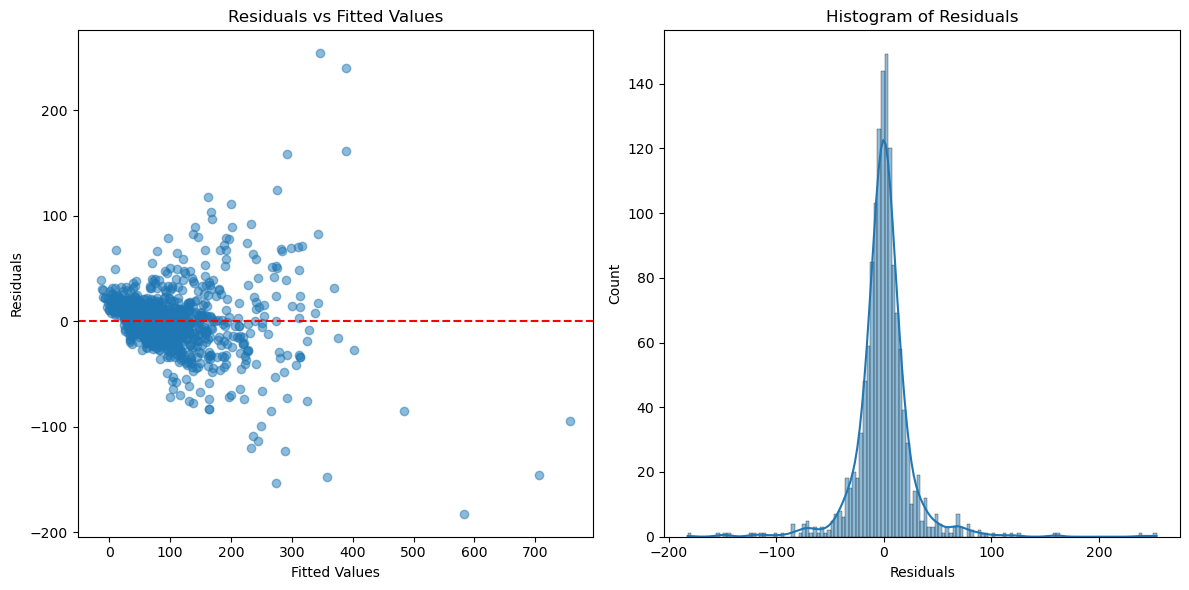

Durbin-watson statistic : 1.97
Breusch - Pagan test results:
             Test Statistic         Value
0  Lagrange Multiplier Stat  4.538942e+02
1                   p-value  4.426636e-15
2                   f-value  2.576449e+00
3                 f p-value  3.125902e-24


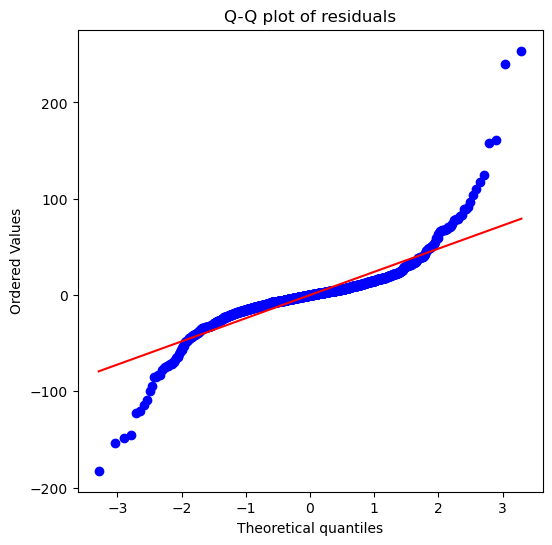

Shapiro_Wilk test: Statistic=0.803 , p-value = 0.000


In [290]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from statsmodels.stats.stattools import durbin_watson 
from statsmodels.stats.diagnostic import het_breuschpagan 
from statsmodels.compat import lzip 
import scipy.stats as stats 

## Assuming y_test and y_pred are available 
residuals = y_test - y_predict 

## Linearity and Homoscedasticity 
plt.figure(figsize = (12,6))

## Residuals and Fitted Values 
plt.subplot(1,2,1)
plt.scatter(y_predict , residuals , alpha = 0.5)
plt.axhline( y = 0 , color = 'r' , linestyle = '--' ) 
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')

## Residuals Histogram 
plt.subplot(1,2,2)
sns.histplot( residuals , kde = True)  
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.tight_layout()
plt.show()

## Autocorrelation 
dw_stat = durbin_watson(residuals)
print(f'Durbin-watson statistic : {dw_stat:.2f}')

## Breusch - Pagan Test for Homoscedasticity 
# Fit the model to get residuals 
import statsmodels.api as sm 
x_with_const = sm.add_constant(x_test) # Add constant for intercept 
model = sm.OLS(y_test , x_with_const).fit()
bp_test = het_breuschpagan(model.resid , model.model.exog)
bp_test_labels = ['Lagrange Multiplier Stat' , 'p-value' , 'f-value' , 'f p-value']
print('Breusch - Pagan test results:')
print(pd.DataFrame(lzip(bp_test_labels,bp_test) , columns = ['Test Statistic' , 'Value']))

## 4. Normality of Residuals 
## Q-Q Plot 
plt.figure(figsize = (6,6))
stats.probplot(residuals , dist = "norm" , plot = plt)
plt.title('Q-Q plot of residuals')
plt.show()

# shapiro-Wilk Test 
shapiro_test = stats.shapiro(residuals)
print(f'Shapiro_Wilk test: Statistic={shapiro_test.statistic:.3f} , p-value = {shapiro_test.pvalue:.3f}')

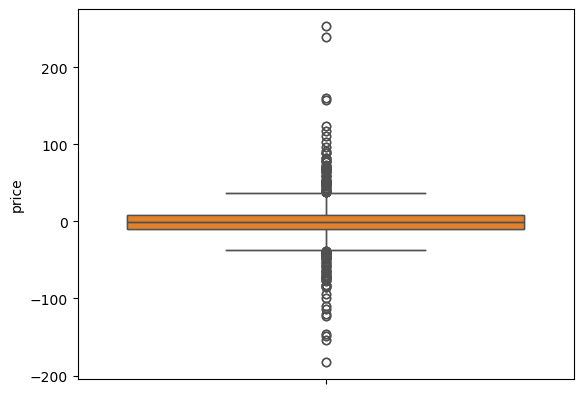

In [292]:
sns.boxplot(residuals)
plt.show()

### Cooks Distance 

In [293]:
from statsmodels.stats.outliers_influence import OLSInfluence 
import statsmodels.api as sm 

## Add constant to the feature matrix 
x_with_constant = sm.add_constant(x)

## Fit the model using statsmodels 
model = sm.OLS(y , x_with_constant).fit()

## Calculate Cooks Distance 
influence = OLSInfluence(model)
cooks_d = influence.cooks_distance[0]

## Identify Influential points eg. cooks distance > 4/n
n = x.shape[0]
influential_points = np.where(cooks_d > 4/n )[0]

## Print Cooks distance for each point and influential points
print("Cook's distance for each point:")
print(cooks_d)

print('\nInfluential points (indices):')
influential_points

Cook's distance for each point:
0       5.579614e-03
1       1.990453e-03
2       6.405243e-04
3       4.602423e-03
4       3.219777e-03
            ...     
9842    3.386722e-06
9844    8.509530e-05
9845    3.809910e-05
9848    1.517805e-07
9849    2.574114e-05
Length: 6947, dtype: float64

Influential points (indices):


array([   0,    1,    2,    3,    4,    5,    6,    9,   31,   50,   60,
         62,  194,  223,  231,  235,  396,  403,  409,  475,  478,  482,
        483,  485,  486,  492,  494,  496,  610,  612,  613,  614,  615,
        616,  618,  619,  620,  622,  626,  635,  651,  652,  653,  654,
        655,  656,  657,  658,  659,  660,  675,  676,  785,  790,  812,
        923,  924,  925,  926, 1010, 1018, 1162, 1163, 1164, 1166, 1170,
       1237, 1266, 1267, 1268, 1273, 1275, 1278, 1280, 1306, 1315, 1317,
       1318, 1319, 1321, 1328, 1329, 1330, 1331, 1333, 1334, 1336, 1337,
       1360, 1452, 1455, 1466, 1787, 1796, 1798, 1825, 1826, 1828, 1830,
       1867, 1934, 1938, 1942, 2242, 2254, 2484, 2597, 2598, 2601, 2603,
       2606, 2609, 2637, 2677, 2684, 2689, 2693, 2694, 2698, 2718, 2719,
       2722, 2723, 2727, 2729, 2730, 2733, 2735, 2736, 2737, 2739, 2740,
       2871, 2873, 2875, 2909, 2916, 2941, 2954, 3086, 3087, 3088, 3225,
       3235, 3238, 3367, 3417, 3424, 3435, 3436, 34

In [336]:
## Removing influential points 
mask = np.ones(x.shape[0] , dtype = bool)
mask[influential_points] = False 
x_clean = x[mask]
y_clean = y[mask]
x_clean_with_const = sm.add_constant(x_clean)
##  Re run the model on the cleaned data 
cleaned_model_results = find_best_model_using_gridsearchcv(x_clean_with_const , y_clean)
print(cleaned_model_results)

               model  best_score                            best_params  \
0  linear_regression    0.895919                                     {}   
1              lasso    0.826338  {'alpha': 0.1, 'selection': 'cyclic'}   
2              ridge    0.896123                         {'alpha': 0.1}   

   adjusted_r2       rmse  
0     0.898246  19.808566  
1     0.822908  26.132218  
2     0.898182  19.814734  


In [330]:
print(x_clean)

      total_sqft  bath  balcony  bhk  1st Block Jayanagar  1st Phase JP Nagar  \
8         1875.0   3.0      1.0    3                  0.0                 1.0   
9         2065.0   4.0      1.0    3                  0.0                 1.0   
11        1394.0   2.0      1.0    2                  0.0                 1.0   
12        1077.0   2.0      2.0    2                  0.0                 1.0   
13        1566.0   2.0      0.0    2                  0.0                 1.0   
...          ...   ...      ...  ...                  ...                 ...   
9842      1155.0   2.0      1.0    2                  0.0                 0.0   
9844      1200.0   2.0      3.0    2                  0.0                 0.0   
9845      1800.0   1.0      1.0    1                  0.0                 0.0   
9848      1353.0   2.0      2.0    2                  0.0                 0.0   
9849       812.0   1.0      0.0    1                  0.0                 0.0   

      2nd Phase Judicial La

In [331]:
print(y_clean)

8       167.0
9       210.0
11      100.0
12       93.0
13      180.0
        ...  
9842     64.0
9844     70.0
9845    200.0
9848    110.0
9849     26.0
Name: price, Length: 6700, dtype: float64


In [337]:
# Create a DataFrame to compare results
comparison_df = pd.DataFrame({
    'Metric': ['Model', 'Best Score', 'Best Params', 'Adjusted R^2', 'RMSE'],
    'Linear Regression Before': [
        best_model_results.loc[best_model_results['model'] == 'linear_regression', 'model'].values[0],
        best_model_results.loc[best_model_results['model'] == 'linear_regression', 'best_score'].values[0],
        best_model_results.loc[best_model_results['model'] == 'linear_regression', 'best_params'].values[0],
        best_model_results.loc[best_model_results['model'] == 'linear_regression', 'adjusted_r2'].values[0],
        best_model_results.loc[best_model_results['model'] == 'linear_regression', 'rmse'].values[0]
    ],
    'Lasso Before': [
        best_model_results.loc[best_model_results['model'] == 'lasso', 'model'].values[0],
        best_model_results.loc[best_model_results['model'] == 'lasso', 'best_score'].values[0],
        best_model_results.loc[best_model_results['model'] == 'lasso', 'best_params'].values[0],
        best_model_results.loc[best_model_results['model'] == 'lasso', 'adjusted_r2'].values[0],
        best_model_results.loc[best_model_results['model'] == 'lasso', 'rmse'].values[0]
    ],
    'Ridge Before': [
        best_model_results.loc[best_model_results['model'] == 'ridge', 'model'].values[0],
        best_model_results.loc[best_model_results['model'] == 'ridge', 'best_score'].values[0],
        best_model_results.loc[best_model_results['model'] == 'ridge', 'best_params'].values[0],
        best_model_results.loc[best_model_results['model'] == 'ridge', 'adjusted_r2'].values[0],
        best_model_results.loc[best_model_results['model'] == 'ridge', 'rmse'].values[0]
    ],
    'Linear Regression After': [
        cleaned_model_results.loc[cleaned_model_results['model'] == 'linear_regression', 'model'].values[0],
        cleaned_model_results.loc[cleaned_model_results['model'] == 'linear_regression', 'best_score'].values[0],
        cleaned_model_results.loc[cleaned_model_results['model'] == 'linear_regression', 'best_params'].values[0],
        cleaned_model_results.loc[cleaned_model_results['model'] == 'linear_regression', 'adjusted_r2'].values[0],
        cleaned_model_results.loc[cleaned_model_results['model'] == 'linear_regression', 'rmse'].values[0]
    ],
    'Lasso After': [
        cleaned_model_results.loc[cleaned_model_results['model'] == 'lasso', 'model'].values[0],
        cleaned_model_results.loc[cleaned_model_results['model'] == 'lasso', 'best_score'].values[0],
        cleaned_model_results.loc[cleaned_model_results['model'] == 'lasso', 'best_params'].values[0],
        cleaned_model_results.loc[cleaned_model_results['model'] == 'lasso', 'adjusted_r2'].values[0],
        cleaned_model_results.loc[cleaned_model_results['model'] == 'lasso', 'rmse'].values[0]
    ],
    'Ridge After': [
        cleaned_model_results.loc[cleaned_model_results['model'] == 'ridge', 'model'].values[0],
        cleaned_model_results.loc[cleaned_model_results['model'] == 'ridge', 'best_score'].values[0],
        cleaned_model_results.loc[cleaned_model_results['model'] == 'ridge', 'best_params'].values[0],
        cleaned_model_results.loc[cleaned_model_results['model'] == 'ridge', 'adjusted_r2'].values[0],
         cleaned_model_results.loc[cleaned_model_results['model'] == 'ridge', 'rmse'].values[0]
    ]
})

comparison_df

,Metric,Linear Regression Before,Lasso Before,Ridge Before,Linear Regression After,Lasso After,Ridge After
0,Model,linear_regression,lasso,ridge,linear_regression,lasso,ridge
1,Best Score,0.845784,0.793494,0.84587,0.895919,0.826338,0.896123
2,Best Params,{},"{'alpha': 0.1, 'selection': 'cyclic'}",{'alpha': 0.1},{},"{'alpha': 0.1, 'selection': 'cyclic'}",{'alpha': 0.1}
3,Adjusted R^2,0.841596,0.791134,0.841576,0.898246,0.822908,0.898182
4,RMSE,30.853355,35.428456,30.855219,19.808566,26.132218,19.814734


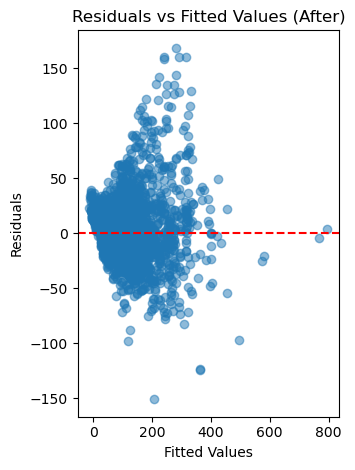

In [338]:
# Fit the model after removing influential points
model_after = sm.OLS(y_clean, x_clean_with_const).fit()
y_predict_after = model_after.predict(x_clean_with_const)
residuals_after = y_clean - y_predict_after

# Residuals vs Fitted Values After
plt.subplot(1, 2, 2)
plt.scatter(y_predict_after, residuals_after, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values (After)')

plt.tight_layout()
plt.show()

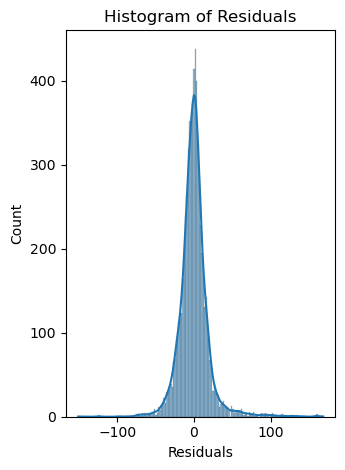

In [342]:
## Residuals Histogram 
plt.subplot(1,2,2)
sns.histplot(residuals_after , kde = True )
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')

plt.tight_layout()
plt.show()

### Autocorrelation

#### Durbin-Watson Statistic : Measures autocorrelation in the residuals . Values close to 2 suggeset no autocorrelation 

In [343]:
dw_stat = durbin_watson(residuals_after)
print(f'Durbin-watson Statistic: {dw_stat:.2f}')

Durbin-watson Statistic: 2.03


### Breusch Pagan Test for Homoscedasticity 

In [345]:
# Fit the model to get residuals
import statsmodels.api as sm
x_train_after , x_test_after , y_train_after , y_test_after = train_test_split( x_clean_with_const , y_clean , test_size = 0.2 , random_state = 10)
model = sm.OLS(y_test_after, x_test_after).fit()
bp_test = het_breuschpagan(model.resid, model.model.exog)
bp_test_labels = ['Lagrange Multiplier Stat', 'p-value', 'f-value', 'f p-value']
print('Breusch-Pagan test results:')
print(pd.DataFrame(lzip(bp_test_labels, bp_test), columns=['Test Statistic', 'Value']))

Breusch-Pagan test results:
             Test Statistic         Value
0  Lagrange Multiplier Stat  3.506129e+02
1                   p-value  6.047439e-06
2                   f-value  1.873357e+00
3                 f p-value  8.675930e-11


### Normality of Residuals 

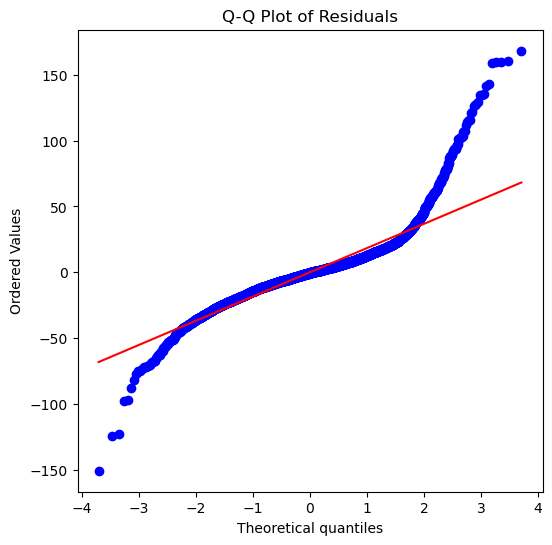

In [348]:
## Q-Q Plot 
plt.figure(figsize = (6,6))
stats.probplot(residuals_after, dist="norm" , plot = plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

### Shapiro-Wilk Test : Tests if Residuals are normally distributed . A high P-value indicates Normality 

In [349]:
shapiro_test = stats.shapiro(residuals_after)
print(f'Shapiro-Wilk test: Statistic={shapiro_test.statistic:.3f} , p-value={shapiro_test.pvalue:.3f}')

Shapiro-Wilk test: Statistic=0.862 , p-value=0.000


C:\Users\smoni\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6700.
  res = hypotest_fun_out(*samples, **kwds)


### Kolmogorov-Smirnov Test for Normality

In [350]:
 ks_test = stats.kstest(residuals_after , 'norm' , args = (residuals_after.mean() , residuals_after.std()))
print(f'Kolmogorov-Smirnov test: Statistics={ks_test.statistic:.3f} , p_value = {ks_test.pvalue:.3f}')

Kolmogorov-Smirnov test: Statistics=0.109 , p_value = 0.000


#### Sequence of EDA, Outlier Handling, Feature Engineering, and Feature Selection The typical sequence in a data science project is as follows:

#### Exploratory Data Analysis (EDA) EDA is the initial step to understand the data. It involves:

##### Understanding the data: Data types (numerical, categorical) Dimensions (rows, columns) Basic statistics (mean, median, mode, standard deviation) Handling missing values: Identifying missing values Imputation or removal based on analysis Identifying outliers: Using box plots, scatter plots, or statistical methods Understanding the nature of outliers (error, valid data point) Exploring relationships: Correlation analysis Visualization techniques (histograms, scatter plots, pair plots) Discovering patterns and trends: Identifying potential features Understanding target variable distribution 2. Outlier Handling (Optional) Based on the findings from EDA, decide whether to handle outliers. This step is optional and depends on the nature of the data and the problem.

##### If outliers are due to errors: Correct or remove them If outliers are valid data points: Consider their impact on the model Potentially transform or cap them 3. Feature Engineering Create new features or transform existing ones to improve model performance.

##### Feature creation: Combining existing features Deriving new features from domain knowledge Feature transformation: Scaling (normalization, standardization) Handling categorical features (encoding) Feature binning Handling skewness 4. Feature Selection Identify the most relevant features for the model.

##### Filter methods: Correlation analysis Chi-square test Wrapper methods: Recursive Feature Elimination (RFE) Embedded methods: Regularization techniques (Lasso, Ridge) Note: These steps are not strictly sequential. You might iterate between EDA, outlier handling, and feature engineering as you gain deeper insights into the data. Feature selection is often done after creating a baseline model to evaluate feature importance.

#### Additional Considerations:

##### Data cleaning: This step can be performed before or during EDA to handle inconsistencies, duplicates, and other data quality issues. Domain knowledge: Incorporate domain expertise to guide feature engineering and selection. Model evaluation: Continuously evaluate the impact of your feature engineering and selection decisions on model performance. By following these steps and iteratively refining your approach, you can effectively extract valuable insights from your data and build robust models.